In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

In [2]:
#importing dataframes
forecasted_consumption = pd.read_excel('data.xlsx', sheet_name= 'Forecasted Consumption')
meter_list = pd.read_excel('data.xlsx', sheet_name= 'Meter List')
rates = pd.read_excel('data.xlsx', sheet_name = 'Rates')

In [3]:
#Check the head
forecasted_consumption.head()

,Date,Meter ID,kWh
0,2022-09-30,10588707,73.335098
1,2022-09-30,10626610,263.375674
2,2022-09-30,1000000603,17.927143
3,2022-09-29,10588707,77.744203
4,2022-09-29,10626610,270.357196


In [4]:
#Check the head
rates.head()

,Date,Exit Zone,Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh)
0,2020-04-01,EA1,0,73200.0,0.0287
1,2020-04-01,EA1,73200,732000.0,0.0228
2,2020-04-01,EA1,732000,NaN,0.1820
3,2020-10-01,EA1,0,73200.0,0.0287
4,2020-10-01,EA1,73200,732000.0,0.0228


In [5]:
#Check the head
meter_list.head()

,Meter ID,Exit Zone,Annual Quantity (kWh)
0,1000000603,SC1,12337
1,10588707,EM2,75123
2,10626610,NW1,151779


In [6]:
#check for null values
forecasted_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2190 non-null   datetime64[ns]
 1   Meter ID  2190 non-null   int64         
 2   kWh       2190 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 51.5 KB


In [7]:
#check for null values
meter_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Meter ID               3 non-null      int64 
 1   Exit Zone              3 non-null      object
 2   Annual Quantity (kWh)  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [8]:
#check for null values
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1026 non-null   datetime64[ns]
 1   Exit Zone              1026 non-null   object        
 2   Annual Quantity (Min)  1026 non-null   int64         
 3   Annual Quantity (Max)  684 non-null    float64       
 4   Rate (p/kWh)           1026 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 40.2+ KB


In [9]:
#check for duplicates
len(forecasted_consumption[forecasted_consumption.duplicated()==True])

0

In [10]:
#check for duplicates
len(meter_list[meter_list.duplicated()==True])

0

In [11]:
#check for duplicates
len(rates[rates.duplicated()==True])

0

# Question 1
### 1.1. Calculate the total cost per meter by summing the costs per day for the full period of the forecast (2020-10-01 to 2022-09-30) and converting to £ (1p = 0.01£)

### 1.2. Calculate the total consumption by summing the forecasted consumption for the full period.

In [12]:
df = pd.merge(rates,meter_list)
df

,Date,Exit Zone,Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh),Meter ID,Annual Quantity (kWh)
0,2020-04-01,EM2,0,73200.0,0.028700,10588707,75123
1,2020-04-01,EM2,73200,732000.0,0.022800,10588707,75123
2,2020-04-01,EM2,732000,NaN,0.182000,10588707,75123
3,2020-10-01,EM2,0,73200.0,0.028700,10588707,75123
4,2020-10-01,EM2,73200,732000.0,0.022800,10588707,75123
...,...,...,...,...,...,...,...
76,2023-10-01,SC1,73200,732000.0,0.031962,1000000603,12337
77,2023-10-01,SC1,732000,NaN,0.261613,1000000603,12337
78,2024-04-01,SC1,0,73200.0,0.036988,1000000603,12337
79,2024-04-01,SC1,73200,732000.0,0.032989,1000000603,12337


In [13]:
# Replacing nan value with a very large number to be sure of maximum annual quantity
df['Annual Quantity (Max)'].fillna(value=1e12, inplace=True)
df

,Date,Exit Zone,Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh),Meter ID,Annual Quantity (kWh)
0,2020-04-01,EM2,0,7.320000e+04,0.028700,10588707,75123
1,2020-04-01,EM2,73200,7.320000e+05,0.022800,10588707,75123
2,2020-04-01,EM2,732000,1.000000e+12,0.182000,10588707,75123
3,2020-10-01,EM2,0,7.320000e+04,0.028700,10588707,75123
4,2020-10-01,EM2,73200,7.320000e+05,0.022800,10588707,75123
...,...,...,...,...,...,...,...
76,2023-10-01,SC1,73200,7.320000e+05,0.031962,1000000603,12337
77,2023-10-01,SC1,732000,1.000000e+12,0.261613,1000000603,12337
78,2024-04-01,SC1,0,7.320000e+04,0.036988,1000000603,12337
79,2024-04-01,SC1,73200,7.320000e+05,0.032989,1000000603,12337


In [14]:
df_to_merge = df[(df['Annual Quantity (kWh)']>=df['Annual Quantity (Min)'])&
        (df['Annual Quantity (kWh)']<df['Annual Quantity (Max)'])]
df_to_merge

,Date,Exit Zone,Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh),Meter ID,Annual Quantity (kWh)
1,2020-04-01,EM2,73200,732000.0,0.022800,10588707,75123
4,2020-10-01,EM2,73200,732000.0,0.022800,10588707,75123
7,2021-04-01,EM2,73200,732000.0,0.023360,10588707,75123
10,2021-10-01,EM2,73200,732000.0,0.023360,10588707,75123
13,2022-04-01,EM2,73200,732000.0,0.024358,10588707,75123
16,2022-10-01,EM2,73200,732000.0,0.024358,10588707,75123
19,2023-04-01,EM2,73200,732000.0,0.025147,10588707,75123
22,2023-10-01,EM2,73200,732000.0,0.025147,10588707,75123
25,2024-04-01,EM2,73200,732000.0,0.025962,10588707,75123
28,2020-04-01,NW1,73200,732000.0,0.028500,10626610,151779


In [15]:
df_merged= pd.merge(forecasted_consumption,df_to_merge,
                   left_on = ['Date','Meter ID'], 
                   right_on = ['Date','Meter ID'],
                   how='left')
df_merged.drop(['Annual Quantity (Min)','Annual Quantity (Max)','Annual Quantity (kWh)','Exit Zone'],axis=1,inplace=True)
df_merged

,Date,Meter ID,kWh,Rate (p/kWh)
0,2022-09-30,10588707,73.335098,NaN
1,2022-09-30,10626610,263.375674,NaN
2,2022-09-30,1000000603,17.927143,NaN
3,2022-09-29,10588707,77.744203,NaN
4,2022-09-29,10626610,270.357196,NaN
...,...,...,...,...
2185,2020-10-02,10626610,316.860290,NaN
2186,2020-10-02,1000000603,26.690797,NaN
2187,2020-10-01,10588707,126.367711,0.0228
2188,2020-10-01,10626610,326.240595,0.0285


In [16]:
df_merged.sort_values(by=['Meter ID','Date'],ascending=(True, True), inplace=True)

In [17]:
df_merged.fillna(method='ffill',inplace=True)
df_merged

,Date,Meter ID,kWh,Rate (p/kWh)
2187,2020-10-01,10588707,126.367711,0.022800
2184,2020-10-02,10588707,118.322449,0.022800
2181,2020-10-03,10588707,94.272125,0.022800
2178,2020-10-04,10588707,97.641038,0.022800
2175,2020-10-05,10588707,138.761245,0.022800
...,...,...,...,...
14,2022-09-26,1000000603,18.553369,0.034706
11,2022-09-27,1000000603,18.801933,0.034706
8,2022-09-28,1000000603,19.015036,0.034706
5,2022-09-29,1000000603,19.263599,0.034706


In [18]:
df_merged['Total Cost (£)'] = df_merged['kWh']*df_merged['Rate (p/kWh)']*(0.01)

In [19]:
df_merged

,Date,Meter ID,kWh,Rate (p/kWh),Total Cost (£)
2187,2020-10-01,10588707,126.367711,0.022800,0.028812
2184,2020-10-02,10588707,118.322449,0.022800,0.026978
2181,2020-10-03,10588707,94.272125,0.022800,0.021494
2178,2020-10-04,10588707,97.641038,0.022800,0.022262
2175,2020-10-05,10588707,138.761245,0.022800,0.031638
...,...,...,...,...,...
14,2022-09-26,1000000603,18.553369,0.034706,0.006439
11,2022-09-27,1000000603,18.801933,0.034706,0.006525
8,2022-09-28,1000000603,19.015036,0.034706,0.006599
5,2022-09-29,1000000603,19.263599,0.034706,0.006686


In [20]:
df_merged.drop(['Rate (p/kWh)'],axis=1,inplace=True)
df_cost = df_merged.groupby(by='Meter ID').sum()

In [21]:
df_cost.rename(columns={'kWh':'Total Estimated Consumption (kWh)'},inplace=True)

In [22]:
df_cost = df_cost.round(decimals=2)
df_cost

,Total Estimated Consumption (kWh),Total Cost (£)
Meter ID,,
10588707,122450.0,28.50
10626610,303558.0,88.24
1000000603,24674.0,8.27


In [23]:
#check if the consumptions are correct
df_merged[(df_merged['Date']=='2020-10-01')&(df_merged['Meter ID']==10588707)]['Total Cost (£)']

2187    0.028812
Name: Total Cost (£), dtype: float64

# Question 2
### Write a function that generates a list of random meters of any size. Examples of valid Exit Zones can be found in the rate table. You may randomly generate the Annual Quantity.

In [24]:
import random

In [25]:
def random_meters():
    '''
    This function randomly creates a set of Meter ID, and assign each of them an Exit Zone.
    Also, this function creates a corresponding annual consumption, which has been assumed to
    follow the triangular distribution.
    The output is a DataFrame with three columns, i.e. Meter ID, Exit Zone, Annual Quantity (kWh).
    
    '''
    #generating a random list based on Meter ID and the number of unique values in Exit Zone.
    meters = random.sample(range(10000000,10000000000),random.randint(1,rates['Exit Zone'].nunique()))
    
    
    #generating corresponding exit zones
    exit_zone = random.sample(set(rates['Exit Zone']),len(meters))
    
    
    
    #generating annual quantity based on the max and min of annual quantity; 
    #we have used the triangular distribution
    annual_quantity = np.random.triangular(left=500,right=2e5,mode=1e4, size = len(meters))
    
    
    
    #Creating a DataFrame based on three lists above
    meter = pd.DataFrame({'Meter ID':meters,'Exit Zone':exit_zone,'Annual Quantity (kWh)':annual_quantity})
    
    return meter

In [26]:
meter = random_meters()

# Question 3
### Write a function that generates mock consumption data given a list of meters and a start and end date.

In [27]:
def consumption_data(start_date='10/1/2020',end_date='9/30/2022',meters=meter['Meter ID'].to_list()):
    '''
    This function creates a DataFrame with three columns. The first column is the date of each day
    between 10/1/2020 and 9/30/2022. The second column creates triangular random numbers for each day
    and each meter. I find this approach better as it allow us to code without using for loops.
    Finally, the DataFrame is stacked and re-indexed to represent a dataset like forecasted_consumption.
    
    '''
    #creating a DataFrame representing chronologic sequence
    consumption_data = pd.date_range(start=start_date, end=end_date, freq="D")
    
    
    #Based on the Forecasted Consumption Table, consumptions have been triangularly distibuted.
    rand_arr = np.random.triangular(left=0,right=700,mode=250, size = (len(consumption_data),len(meters)))
    
    
    #creting a DataFrame representing consumption data for different dates and meters
    consum = pd.DataFrame(data=rand_arr,index=consumption_data,columns=meters)
    
    
    # we have to reduce one dimension of our DataFrame to make it possible for the rest of practice.
    
    #by stack, we summurize the columns to indexes; in other words, we reduce one dimension of our Datarame
    df = pd.DataFrame(consum.stack(), columns=['kWh'])
    df.reset_index(inplace=True)
    df.columns = ['Date','Meter ID','kWh']
    
    
    return df

In [28]:
consumption_data().head()

,Date,Meter ID,kWh
0,2020-10-01,5663043632,470.447137
1,2020-10-01,7521245159,337.163854
2,2020-10-01,9355714022,460.893413
3,2020-10-02,5663043632,270.570128
4,2020-10-02,7521245159,552.060603


# Question 4
### 4.1. Write a function that takes as an input a meter list and a consumption table and returns the Transportation cost table. 

In [29]:
def transportation_cost(meter = meter,consumption = consumption_data(), rates = rates):
    '''
    This function integrates all the process implemented in question 1 with the exeption that this 
    fundtion uses two random datasets that have been defined in question 3 and 4.
    '''
    #Determination of rates
    df = pd.merge(rates,meter)
    df['Annual Quantity (Max)'].fillna(value=1e12, inplace=True)
    df_before_merge = df[(df['Annual Quantity (kWh)']>=df['Annual Quantity (Min)'])&
        (df['Annual Quantity (kWh)']<df['Annual Quantity (Max)'])]
    
    
    #merging the rates and consumption data DataFrames
    df_merged= pd.merge(consumption,df_before_merge,
                   left_on = ['Date','Meter ID'], 
                   right_on = ['Date','Meter ID'],
                   how='left')
    df_merged.drop(['Annual Quantity (Min)','Annual Quantity (Max)','Annual Quantity (kWh)','Exit Zone'],axis=1,inplace=True)
    
    
    # Sorting the DataFrame based on Meter ID and Date
    df_merged.sort_values(by=['Meter ID','Date'],ascending=(True, True), inplace=True)
    
    
    # Expanding rates for six months
    df_merged.fillna(method='ffill',inplace=True)
    
    
    # creating cost column
    df_merged['Total Cost (£)'] = df_merged['kWh']*df_merged['Rate (p/kWh)']*(0.01)
    
    
    # creating cost DataFrame
    df_merged.drop(['Rate (p/kWh)'],axis=1,inplace=True)
    df_cost = df_merged.groupby(by='Meter ID').sum()
    
    df_cost.reset_index(inplace=True)
    return df_cost.round(decimals=2)  

### 4.2. Benchmark this function using meter lists of different sizes. Try longer periods as well? How does the function scale? 

In [30]:
transportation_cost().head()

,Meter ID,kWh,Total Cost (£)
0,5663043632,230463.66,69.16
1,7521245159,228354.79,68.53
2,9355714022,230585.71,54.10


In [31]:
#Benchmarking the code
import time
import timeit

In [32]:
from random import randrange
from datetime import timedelta
from datetime import datetime

def random_date(start, end):
    """
    Using this function, we generate two dates between start and end dates for the meters' operation.
    The start and end date are the ones presented in the project description for question 1.
    """
    delta = end - start
    random_days = randrange(delta.days)
    
    date = start + timedelta(days=random_days)
    return date

In [33]:
'''
Benchmarking: 
This cell uses the concept of Monte-Carlo simulation to eliminate the deviations that might occur
in the process. This way, we deal with mean as an statistical value.
''' 

l=[]

for i in range(10000):
    
    
    start_date = random_date(datetime(2020,10,1),datetime(2022,9,30))
    end_date = random_date(start_date, datetime(2022,10,30))
    
    
    #time needed for the meter function
    start_time = timeit.default_timer()
    meter = random_meters()
    meter_exe_end = timeit.default_timer()
    meter_exe_time = meter_exe_end - start_time
    
    
    
    #time needed for the consumption function
    consumption = consumption_data(start_date=start_date, end_date=end_date, meters=meter['Meter ID'].to_list())
    consumption_exe_end = timeit.default_timer()
    consumption_exe_time = consumption_exe_end - meter_exe_end
    
    
    
    #time needed for the transportation cost function
    transportation_cost(meter = meter,consumption = consumption, rates = rates)
    transportation_exe_time = timeit.default_timer() - consumption_exe_end
    
    
    #total time
    total_exe_time = meter_exe_time + consumption_exe_time + transportation_exe_time



    #other variables
    meter_number = len(meter)
    duration = end_date - start_date
    days=duration.days
    
    
    #list
    l.append([meter_number, meter_exe_time,consumption_exe_time, transportation_exe_time,days, total_exe_time])

   
#converting a list to a DataFrame
benchmark = pd.DataFrame(l,columns = ['meter_number', 'meter_exe_time','consumption_exe_time', 'transportation_exe_time','days', 'total_exe_time'])

In [34]:
benchmark.describe()

,meter_number,meter_exe_time,consumption_exe_time,transportation_exe_time,days,total_exe_time
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.295800,0.000793,0.002122,0.014309,195.187100,0.017224
std,10.909345,0.000222,0.000583,0.003351,167.334637,0.003858
min,1.000000,0.000602,0.001523,0.010179,0.000000,0.012404
25%,10.000000,0.000678,0.001780,0.012094,57.000000,0.014651
50%,19.000000,0.000718,0.001972,0.013417,146.000000,0.016236
75%,29.000000,0.000813,0.002268,0.015480,297.000000,0.018601
max,38.000000,0.004664,0.021172,0.052463,749.000000,0.075500


In [35]:
benchmark.corr()

,meter_number,meter_exe_time,consumption_exe_time,transportation_exe_time,days,total_exe_time
meter_number,1.000000,0.078191,0.172404,0.304954,-0.001749,0.295463
meter_exe_time,0.078191,1.000000,0.536902,0.405883,0.004466,0.491183
consumption_exe_time,0.172404,0.536902,1.000000,0.645071,0.245875,0.742335
transportation_exe_time,0.304954,0.405883,0.645071,1.000000,0.453102,0.989513
days,-0.001749,0.004466,0.245875,0.453102,1.000000,0.431028
total_exe_time,0.295463,0.491183,0.742335,0.989513,0.431028,1.000000


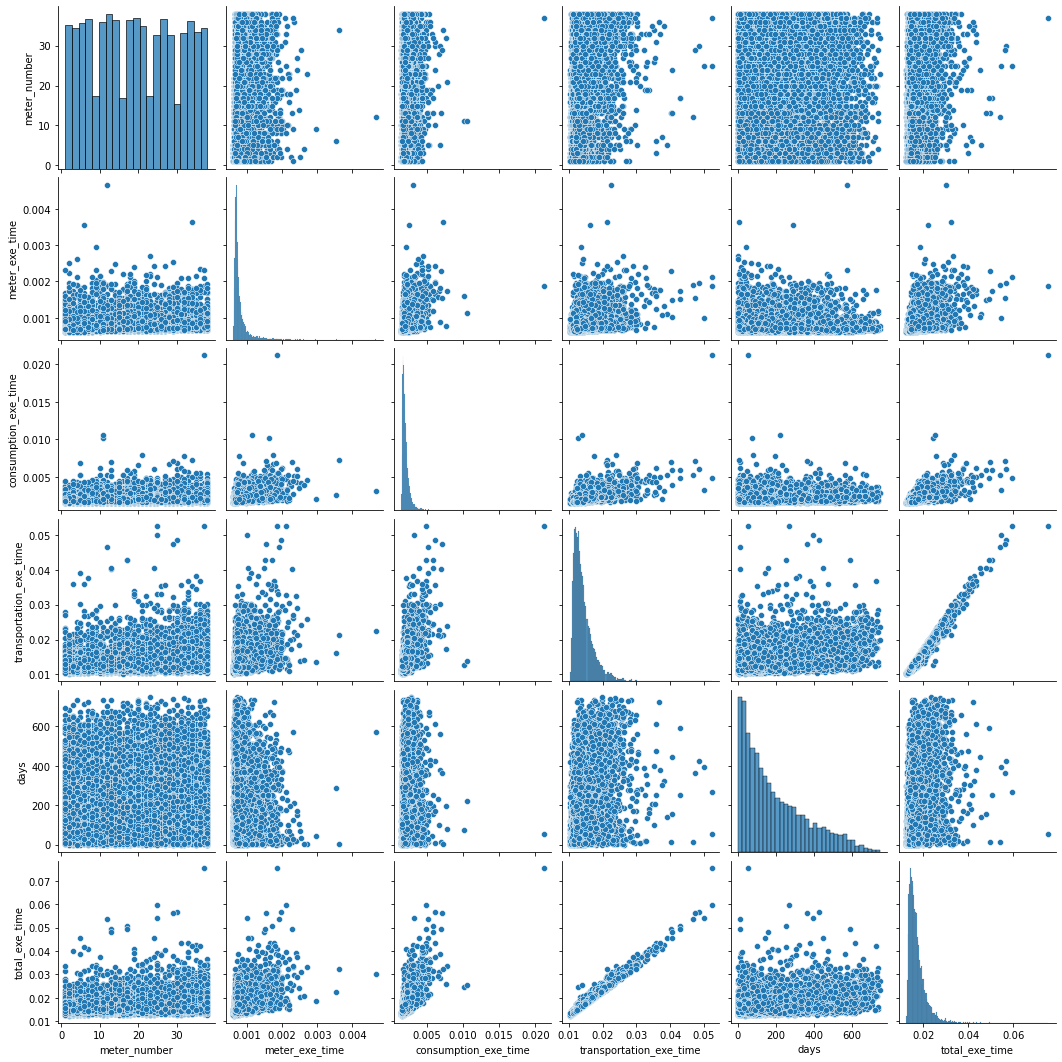

In [36]:
#pairplot elucidates the correlations of different columns
sns.pairplot(data=benchmark)

# Question 5
### What are your observations after benchmarking? Are there any steps in the cost calculation that can be improved? How would you go about improving the performance of such a calculation?

In [37]:
def transportation_cost2(meter = meter,consumption = consumption_data(), rates = rates):
    '''
    This function is the modified version of transportation_cost function. The main changes are
    associated with the elimination of dummy variables. 
    '''
    
    
    
    
    #Determination of rates
   
    '''
    1st modification: 
    
    Instead of defining a new dataframe, I filled the null values in one line
    '''
    df = pd.merge(rates,meter).fillna(value=1e12)
    
    '''
    2nd modification:
    
    Instead of defining a new dataframe for selecting the rows in which the annual quantity is between
    the max and min, i.e.
    df_before_merge = df[(df['Annual Quantity (kWh)']>=df['Annual Quantity (Min)'])&
        #(df['Annual Quantity (kWh)']<df['Annual Quantity (Max)'])],
    In the next line, the selection process is conducted in one line to be merged with consumption dataframe.
    
    '''

    
    
    #merging the rates and consumption data DataFrames
    '''
    3rd modification: 
    
    Instead of merging in one line and drop the column in another line
    , I droped the unnecessary columns immediately.
    '''
    df_merged= pd.merge(consumption,df[(df['Annual Quantity (kWh)']>=df['Annual Quantity (Min)'])&
        (df['Annual Quantity (kWh)']<df['Annual Quantity (Max)'])],
                   left_on = ['Date','Meter ID'], 
                   right_on = ['Date','Meter ID'],
                   how='left').drop(['Annual Quantity (Min)','Annual Quantity (Max)',
                    'Annual Quantity (kWh)','Exit Zone'],axis=1)
    
    
    # Sorting the DataFrame based on Meter ID and Date
    df_merged.sort_values(by=['Meter ID','Date'],ascending=(True, True), inplace=True)
    
    
    # Expanding rates for six months
    df_merged.fillna(method='ffill',inplace=True)
    
    
    # creating cost column
    df_merged['Total Cost (£)'] = df_merged['kWh']*df_merged['Rate (p/kWh)']*(0.01)
    
    
    # creating cost DataFrame
    '''
    4th modification:
    
    Instead of droping, saving, and then conducting groupby function, 
    I have done the drop function and groupby function in one line
    '''
    
    df_cost = df_merged.drop(['Rate (p/kWh)'],axis=1).groupby(by='Meter ID').sum()
    
    df_cost.reset_index(inplace=True)
    return df_cost.round(decimals=2)  

In [38]:
# Benchmarking with the newly defined function for transportation_cost2


l=[]

for i in range(10000):
    
    
    start_date = random_date(datetime(2020,10,1),datetime(2022,9,30))
    end_date = random_date(start_date, datetime(2022,10,30))
    
    
    #time needed for the meter function
    start_time = timeit.default_timer()
    meter = random_meters()
    meter_exe_end = timeit.default_timer()
    meter_exe_time = meter_exe_end - start_time
    
    
    
    #time needed for the consumption function
    consumption = consumption_data(start_date=start_date, end_date=end_date, meters=meter['Meter ID'].to_list())
    consumption_exe_end = timeit.default_timer()
    consumption_exe_time = consumption_exe_end - meter_exe_end
    
    
    
    #time needed for the transportation cost function2
    transportation_cost2(meter = meter,consumption = consumption, rates = rates)
    transportation_exe_time = timeit.default_timer() - consumption_exe_end
    
    
    #total time
    total_exe_time = meter_exe_time + consumption_exe_time + transportation_exe_time



    #other variables
    meter_number = len(meter)
    duration = end_date - start_date
    days=duration.days
    
    
    #list
    l.append([meter_number, meter_exe_time,consumption_exe_time, transportation_exe_time,days, total_exe_time])

   
#converting a list to a DataFrame
benchmark2 = pd.DataFrame(l,columns = ['meter_number', 'meter_exe_time','consumption_exe_time', 'transportation_exe_time','days', 'total_exe_time'])

In [39]:
benchmark2.describe()

,meter_number,meter_exe_time,consumption_exe_time,transportation_exe_time,days,total_exe_time
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.551700,0.000724,0.001918,0.013255,195.362000,0.015896
std,10.998337,0.000136,0.000320,0.002097,166.332807,0.002337
min,1.000000,0.000604,0.001545,0.010592,0.000000,0.012840
25%,10.000000,0.000665,0.001721,0.011864,59.000000,0.014325
50%,19.000000,0.000693,0.001841,0.012599,148.000000,0.015181
75%,29.000000,0.000742,0.002027,0.013898,297.000000,0.016657
max,38.000000,0.006078,0.013087,0.030650,744.000000,0.038029


In [40]:
benchmark2.corr()

,meter_number,meter_exe_time,consumption_exe_time,transportation_exe_time,days,total_exe_time
meter_number,1.000000,0.149821,0.276236,0.439410,-0.008710,0.440803
meter_exe_time,0.149821,1.000000,0.292369,0.177571,-0.002686,0.257499
consumption_exe_time,0.276236,0.292369,1.000000,0.608800,0.406825,0.700199
transportation_exe_time,0.439410,0.177571,0.608800,1.000000,0.626002,0.990953
days,-0.008710,-0.002686,0.406825,0.626002,1.000000,0.617243
total_exe_time,0.440803,0.257499,0.700199,0.990953,0.617243,1.000000


In [41]:
#percentage of improvement
t1 = benchmark.describe().loc['mean','transportation_exe_time']
t2 = benchmark2.describe().loc['mean','transportation_exe_time']
print(f'The improvement percentage =  {abs((t2-t1)/t1)}')

The improvement percentage =  0.07368668931711915
